# PROJETO 1: Guilherme Gonçalves Silva - 237960
## Avisos
> - Assim que abrir o arquivo dê um "Run All" para atualizar as definições das funções;
> - Manhtenha a planilha com a resolução dos exercícios propostos e esse arquivo .ipynb no mesmo diretório
> - Se ocorrer o erro do pandas não encontrar a planilha use o comando "cd PASTA" no prompt de comando, substituindo PASTA pelo nome do diretório do Diretório base do seu Workspace.

# 1) CSTRs em série com reciclo
Esse problema é adaptado de Chapra e Canale (2005), ao estudar um sistema de quatro CSTRs isolados termicamente nos quais uma reação irreversível de primeira ordem A → B acontece. Uma solução com reagente A a uma concentração de 1 mol/L alimenta o primeiro reator a uma vazão volumétrica de 10 L/h. Estão presentes reciclos do reator 3 para o reator 2 e do reator 4 para o reator 3, cujas vazões volumétricas são 5 L/h e 3 L/h, respectivamente.

![ReactorQ1](img\reactorQ1.png)

Os reatores possuem diferentes volumes e operam em temperaturas distintas. A Tabela 1 mostra o volume
e a constante de reação para cada reator.

| Reator | V (L) | k (1/h) |
| ------ | ----- | ------- |
| 1      | 25    | 0,075   |
| 2      | 75    | 0,15    |
| 3      | 100   | 0,4     |
| 4      | 25    | 0,1     |
> ##### *Tabela 1:* Volume e constante de reação de cada CSTR.
Encontre a concentração do reagente A em cada reator no estado estacionário:
> ##### a) resolvendo o sistema de equações algébricas lineares usando inversão de matrizes no Excel;
> O princípio para a resolução do problema foi o estabelecimento do balanço de massa para cada tanque. Como exemplo o tanque 2 é modelado por:
>
> &nbsp;&nbsp;&nbsp;&nbsp; E - S - C = 0
>
> &nbsp;&nbsp;&nbsp;&nbsp; Q<sub>12</sub>*c<sub>a1</sub> + Q<sub>32</sub>*c<sub>a3</sub> - Q<sub>23</sub>*c<sub>a2</sub> - k<sub>2</sub>*V<sub>2</sub>*c<sub>a2</sub> = 0
> Mas é possível expandir essa modelagem para n CSTR em série com reciclo a partir do sistema linear Ax = b
>
> A:
>| Reator |       |        |        |        |        |
>| ------ | ----- | ------ | ------ | ------ | ------ |
>| 1      |(E -S -k<sub>1</sub>*V<sub>1</sub>)<sub> associado a c<sub>a1</sub></sub>|(E -S)<sub> associado a c<sub>a2</sub></sub>|(E -S)<sub> associado a c<sub>a3</sub></sub>|...|(E -S)<sub> associado a c<sub>an</sub></sub>|
>| 2      |(E -S)<sub> associado a c<sub>a1</sub></sub>|(E -S -k<sub>2</sub>*V<sub>2</sub>)<sub> associado a c<sub>a2</sub></sub>|(E -S)<sub> associado a c<sub>a3</sub></sub>|...|(E -S)<sub> associado a c<sub>an</sub></sub>|
>| 3      |(E -S)<sub> associado a c<sub>a1</sub></sub>|(E -S)<sub> associado a c<sub>a2</sub></sub>|(E -S -k<sub>3</sub>*V<sub>3</sub>)<sub> associado a c<sub>a3</sub></sub>|...|(E -S)<sub> associado a c<sub>an</sub></sub>|
>| ...    |...|...|...                                                      |...|...|
>| n      |(E -S)<sub> associado a c<sub>a1</sub></sub>|(E -S)<sub> associado a c<sub>a2</sub></sub>|(E -S)<sub> associado a c<sub>a3</sub></sub>|...|(E -S -k<sub>n</sub>*V<sub>n</sub>)<sub> associado a c<sub>an</sub></sub>|
>
> x:
>|  |
>| ------ |
>| c<sub>a1</sub>      |
>| c<sub>a2</sub>      |
>| c<sub>a3</sub>      |
>| ...    |
>| c<sub>a4</sub>      |
>
> b:
>|  |
>| ------ |
>| - c<sub>a0</sub>*Q<sub>0</sub>      |
>| 0      |
>| 0     |
>| ...    |
>| c<sub>as</sub>*Q<sub>s</sub>      |
>
> Sendo que o vetor b possui ou a primeira coordenada ou a última, dependendo da condição fornecida pelo problema. podemos então usar as condições fornecidas no enunciado e resolver o problema no excel 
> Os cálculos podem ser conferidos em [`237960_PROJETO_1.xlsm`](237960_PROJETO_1.xlsm)

> ##### b) usando a ferramenta Solver do Excel;
> O processo com o solver utiliza o mesmo pricípio das matrizes, mas ao invés de inverter a matrix A para encontrar o vetor x, o sistema é transformado numa função de x da forma vetorial f(x) = Ax - b, e é pedido que o solver encontre x ral que f(x) = 0. A macro pode também ser conferida na Planilha.
>
> ##### c) resolvendo o sistema de equações algébricas lineares usando inversão de matrizes em Python;
> De acordo com o que pode ser visto abaixo no código da função _cstr()_ caso a tag _metodo_=1 então a resolução do sistema será feita por inversão da matriz A.

> ##### d) usando a função fsolve da biblioteca do python scipy.
> De acordo com o que pode ser visto abaixo no código da função _cstr()_ caso a tag _metodo_=0 então a resolução do sistema será feita pela função fsolve so scipy.

Digite os valores das vazões positivas para entrada e negativas para saída de cada reator! 
 Os vetores de vazão (Q_n) devem ser compostos em cada posição pela soma das vazões associadas a concentração 
 do reagente A em cada tanque [c_a1, c_a2, ..., c_an], exemplo: o vetor vazão do tanque 1 é Q_1 =[-10, 0, ..., 0]
C_a1 = 0.84211 mol/L
C_a2 = 0.33822 mol/L
C_a3 = 0.09144 mol/L
C_a4 = 0.07669 mol/L
Elapsed time: 0.00000 seconds


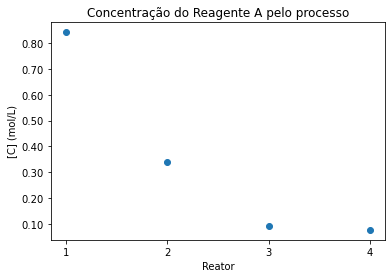

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc
import time
from matplotlib.ticker import FormatStrFormatter
#cstr simples isotérmico A -> B
def cstr(n_reatores, tag=1, metodo=0, grafico=1):
    """
    Resolve o problema de um sistema de reatores contínuos em série, onde o reagente A é consumido em cada reator.

    Parâmetros:
    n_reatores (int): número de reatores na série.
    tag (int): se 0, os valores de entrada devem ser inseridos pelo usuário. Se 1, valores pré-definidos serão usados.
    metodo (int): método a ser usado para resolver o sistema de equações. Se 0, fsolve do scipy será usado. Se 1, a inversa da matriz A será usada.
    grafico (int): se 1, um gráfico dos resultados será plotado. Se 0, uma tupla com os resultados será retornada.

    Retorna:
    Se grafico=1, nenhum valor é retornado. Se grafico=0, uma tupla com dois elementos é retornada. O primeiro elemento é uma lista com o número dos reatores, o segundo é uma lista com as concentrações de A em cada reator.

    """
    print("Digite os valores das vazões positivas para entrada e negativas para saída de cada reator!", "\n", 
          "Os vetores de vazão (Q_n) devem ser compostos em cada posição pela soma das vazões associadas a concentração", "\n",
          "do reagente A em cada tanque [c_a1, c_a2, ..., c_an], exemplo: o vetor vazão do tanque 1 é Q_1 =[-10, 0, ..., 0]")
    A=[]
    if tag == 0:
        for i in range(1, n_reatores+1):
            Q=input("Insira Q_"+ str(i)+ " com as "+str(n_reatores)+" entradas do vetor separadas por espaço: ")
            A.append([int(vaz) for vaz in Q.split(' ')])
        k=[float(const) for const in input("Insira as constantes de reação separadas por espaço: ").split(' ')]
        V=[float(vol) for vol in input("Insira os volumes de cada um dos reatores separados por espaço: ").split(' ')] 
        entrada = int(input("Qual o valor da entrada multiplicada pela vazão? "))       
    else:
        A=[[-10, 0, 0, 0], [10, -15, 5, 0], [0, 15, -18, 3], [0, 0, 13, -13]]
        k=[0.075, 0.15, 0.4, 0.1]
        V=[25, 75, 100, 25]
        entrada = 10 
    start = time.time()     
    r = [-k[i]*V[i] for i in range(n_reatores)]
    for i in range(n_reatores):
        A[i][i] += r[i]
    b = np.transpose([[-entrada] + [0 for k in range(n_reatores-1)]])
    
    if metodo==0:
        def equa(x, *data):
            A_matrix, b_matrix = data
            guess = np.transpose([x])
            return np.transpose(np.matmul(A_matrix, guess) - b_matrix)[0]
        dados = (A, b)
        roots = sc.fsolve(equa, [1 for i in range(n_reatores)], args=dados)
    else:
        roots = np.transpose(np.matmul(np.linalg.inv(A), b))[0]
    for i in range(n_reatores):
        print("C_a{0} = {1:.5f} mol/L".format(i+1, roots[i]))
        if i==(n_reatores-1):
            end = time.time()
            elapsed = end - start
            print(f"Elapsed time: {elapsed:.5f} seconds")
    if grafico==1:
        fig, ax = plt.subplots()
        ax.set_xlabel('Reator')
        plt.xticks(range(1, n_reatores+1))
        ax.set_ylabel('[C] (mol/L)')
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.set_title('Concentração do Reagente A pelo processo')
        plt.scatter(range(1, n_reatores+1), roots)
        plt.show()
    else:
        return (range(1, n_reatores+1), roots)

# Executando a função
cstr(4)

# 2) Reação isotérmica em um CSTRs
![ReactorQ1](img\Q2.png)

> a) A função cstr2() visa desenvolver o problema apresentado nas diferentes rotas de solução. Com seus parâmetros padrão ela irá resolver o sistema de equações descrito em equa2() pelo método fsolce do scipy. Destaca-se que o problema foi generalizado, as constantes (F, V, A1, B1, C1, D1) podem ser substituídas facilmente por novos valores se necessário.
>
> b)
>
> &nbsp;&nbsp;&nbsp;&nbsp; i. Seguindo na cstr2() se o metódo solicitado é de newton-raphson, será invocada a função get_J(). Para determinar analiticamente a matriz Jacobiana parte-se do sistemas de equações inserido no código através do pacote computacional Sympy que lida com cálculo simbólico no python, as linhas 96 a 100 são responsáveis por realizar aa tradução do sistema de equações. Então, define-se as variávies da equação (passo essencial para indicar quais símbolos podem ser vistos como variáveis e quais podem ser vistos como constantes). Através do método lambdify cria-se a função F() que é dependente das variáveis definidas, sendo então uma função lambda comum do python e não mais uma expressão simbólica.
>
> &nbsp;&nbsp;&nbsp;&nbsp;  O método diff() permite realizar as derivada parciais de cada equação em relação as incógnitas do sistema, o for loop em ninho já garante que essas derivadas (expressões simbólicas), vão ser colocadas nas posições corretas da matriz Jacobiana, ao completar os loops as linhas 110 e 111 defininem a J_func() analítica para calcular o jacobiano. 
>
> &nbsp;&nbsp;&nbsp;&nbsp; Por fim o return da get_J() é executar o próprio método de newthon-raphson, já que a J_func() é analítica o método de N-R também será. A função substitui os valores de x0 em J_Func() e chama de Jx, logo após calcula o vetor B = - F(x0) + Jx^-1 * x0, e o parâmetro method define se o sistema linear (Jx)(x_i)=B vai ser resolvido por inversão de matrizes ou pelo solucionador de sistemas lineares do numpy. As linhas 34 a 36 são responsáveis por imprimir os resultados e indicar os sistemas utilizados.
>
> &nbsp;&nbsp;&nbsp;&nbsp; ii. O princípio para a rotina da determinação numérica do sistema é a mesma, a única diferença é que a função J_func() vai ser difinida de forma diferente, utilizando o método das diferenças finitas. O delta padrão assumido é de 1e-6, o vetor "e" cuida de aumentar cada coordenada do vetor de resposta do sistema linear no delta utilizado e manter os demais constantes.
>
> &nbsp;&nbsp;&nbsp;&nbsp; O método de N-R funciona de forma muuito semelhante ao já explicado, porém agora Jx depende de x e do sistema de equações F().


In [10]:
import numpy as np
import scipy.optimize as sc
import time
from matplotlib.ticker import FormatStrFormatter
import sympy as sp

def equa2(c, data):
    A, B, C, D = c
    F, V, A1, B1, C1, D1 = data
    return [F*(A1-A)-0.855*A*B*V, F*(B1-B)-0.855*A*B*V, F*(C1-C)+0.855*A*B*V, F*(D1-D)+0.855*A*B*V]


def cstr2(f_solve=1, numerico=1, tag=0):
    if tag==0:
        # usa dados padrões 
        dados = [5, 40, 0.7, 0.4, 0., 0.]
    else:
        # usa dados fornecdos pelo usuário
        dados = [int(const) for const in input("Insira F, V, A1, B1, C1, D1 separados por espaço: ").split(' ')]
    if f_solve==1:
        # resolve pelo solver
        s = time.time()
        roots = sc.fsolve(equa2, [1 for i in range(4)], args=dados)
        e = time.time()
    else:
        # calcula Jacobiano analíticamente
        s = time.time()
        roots = get_J(dados, _type=numerico, flag=tag)
        e = time.time()
    print("\n", "Tipo: {0}, Método: {1}".format("fsolve" if f_solve==1 else "newton-raphson", \
                                                "Analítico" if numerico==0 else "Numérico"))
    seconds = e - s
    print(f"Tempo parcial: {seconds:.5f} segundos")
    for i in range(4):
        letters = ["a", "b", "c", "d"]
        print("C_{0} = {1:.5f} mol/L".format(letters[i], roots[i]))


def newton_raphson_system(F, J, _type=1, tag=0, method=0, maxiter=100, tol=1e-6, x_0=[1, 1, 1, 1]):
    """
    Solves a system of nonlinear equations F(x) = 0 using the Newton-Raphson method.

    Parameters:
        F (function): A function that takes a vector x as input and returns a vector of function values.
        J (function): A function that takes a vector x as input and returns a Jacobian matrix.
        x0 (ndarray): An initial guess for the solution.
        maxiter (int): Maximum number of iterations.
        tol (float): Tolerance for stopping criterion.
        method (int): 0 for solver, 1 for matrix inversion

    Returns:
        x (ndarray): The solution to the system of equations.
    """
    if tag==1:
        # pede dados do usuário
        x0_str = input("Enter initial guess separated by commas: ")
        x0 = np.array([float(x) for x in x0_str.split(',')])
    else:
        # resolve o sistema padrão
        x0 = np.array(x_0)
    start_time = time.time()
    x = [x0.copy()]
    for i in range(maxiter):
        if i != 0:
            x = np.transpose(x)
        f = F(*x[0])
        if _type == 0:
            # analítico
            Jx = J(x[0]).astype('float64')
        elif _type == 1:
            Jx = J(F, x[0]).astype('float64')
        x_mult = np.transpose(x)
        f_mult = np.transpose([f])
        B = -1*f_mult + np.matmul(Jx, x_mult)
        if method == 0:
            dx = np.linalg.solve(Jx, B)
        elif method == 1:
            Jx_inv = np.linalg.inv(Jx)
            dx = np.matmul(Jx_inv, B)
        x = dx
        if np.linalg.norm(f) < tol:
            x = np.transpose(x)
            # print(f"Elapsed time: {elapsed_time:.5f} seconds")
            return x[0]
    raise ValueError("Newton-Raphson method did not converge")


def get_J(dados_, _type=1, flag=0):
    # get input equations from user
    if flag==1:
        eqns_str = input("Enter system of equations separated by commas (use x0, x1, ..., xn for variables): ")
        eqns = [sp.sympify(eqn) for eqn in eqns_str.split(',')]
    else:
        F, V, A1, B1, C1, D1 = dados_
        eqns_str = "{4}*({5}-{0})-0.855*{0}*{1}*{9}, {4}*({6}-{1})-0.855*{0}*{1}*{9}, \
            {4}*({7}-{2})+0.855*{0}*{1}*{9}, \
                {4}*({8}-{3})+0.855*{0}*{1}*{9}".format("x0", "x1", "x2", "x3", F, A1, B1, C1, D1, V)
        eqns = [sp.sympify(eqn) for eqn in eqns_str.split(',')]
    # define variables and create function for F
    vars = sp.symbols('x0:%d' % len(eqns))
    F = sp.lambdify(vars, eqns)
    if _type == 0:
        # compute Jacobian matrix using SymPy
        J = sp.Matrix.zeros(len(eqns), len(eqns))
        for i in range(len(eqns)):
            for j in range(len(eqns)):
                J[i, j] = sp.diff(eqns[i], vars[j]).evalf()
        def J_func(x):
            return np.array([[J[i,j].subs(zip(vars, x)).evalf() for j in range(len(eqns))] for i in range(len(eqns))])
    else:
        def J_func(F, x, eps=1e-6):
            """
            Computes the Jacobian matrix numerically for a system of n equations and n variables using finite differences.

            Parameters:
                F (function): A function that takes a vector x as input and returns a vector of function values.
                x (ndarray): A vector of current values for the variables.
                eps (float): A small value for the finite difference approximation.

            Returns:
                J (ndarray): The Jacobian matrix.
            """
            n = len(x)
            Jacob = np.zeros((n, n))
            e = np.zeros(n)
            for j in range(n):
                e[j] = 1
                Jacob[:, j] = (np.transpose(F(*(x + eps * e))) - np.transpose(F(*x))) / eps
                e[j] = 0
            return Jacob
    # solve system using Newton-Raphson method
    return newton_raphson_system(F, J_func, _type=_type)
    # print("Solution: ")
    # for i in range(len(x)):
    #     print('x{0}: {1:.4f}'.format(i, x[i]))

cstr2(f_solve=0)
cstr2(f_solve=0, numerico=0)
cstr2(f_solve=1)


 Tipo: newton-raphson, Método: Numérico
Tempo parcial: 0.60715 segundos
C_a = 0.40592 mol/L
C_b = 0.10592 mol/L
C_c = 0.29408 mol/L
C_d = 0.29408 mol/L

 Tipo: newton-raphson, Método: Analítico
Tempo parcial: 0.07302 segundos
C_a = 0.40592 mol/L
C_b = 0.10592 mol/L
C_c = 0.29408 mol/L
C_d = 0.29408 mol/L

 Tipo: fsolve, Método: Numérico
Tempo parcial: 0.00000 segundos
C_a = 0.40592 mol/L
C_b = 0.10592 mol/L
C_c = 0.29408 mol/L
C_d = 0.29408 mol/L


# 3) CSTR com jaqueta de resfriamento

![ReactorQ3a](img\Q3A.png)
![ReactorQ3b](img\Q3B.png)
>
> Os itens dessa questão foram resolvidos com o mesmo código base da questão anterior. As maiores diferenças encontram-se na nova função que descreve o sistema de equações equa3(), nos dados iniciais que foram fornecidos no exercício e são carregados no sistema através da da lista "dados" na linha 11, na inserção do sistema de cinco equações e cinco variáveis de forma simbólica nas linhas 91 e 92 para cálculo do Jacobiano, e por fim, o cálculo da constante da taxa de reação que depende da temperatura do sistema, sendo incorporada ao cálculo do sistema.
>
> A constante da taxa foi modelada de acordo com a equação de Arrhenius:
> &nbsp;&nbsp;&nbsp;&nbsp; k = k<sub>0</sub>e<sup>-E<sub>a</sub>/(RT)</sup>
>
> &nbsp;&nbsp;&nbsp;&nbsp; A resolução em Excel está feita na planilha "Questão 3" da pasta [`237960_PROJETO_1.xlsm`](237960_PROJETO_1.xlsm), foi preciso rodar o Solver mais de uma vez para que os critérios de convergência fossem atendidos, o alto caráter não linear do sistema dificulta a resolução por essa ferramenta.


In [11]:
def equa3(c, data):
    A, B, C, T, T_j = c
    A1, B1, C1, rho, c_p, Area, V, k0, Ea, R, delta_H, U, c_pj, rho_j, Q, Q_j, T_in, T_jin = data
    k = k0*np.exp(-Ea/(R*T))
    return [Q*(A1-A)-k*A*B*V, Q*(B1-B)-k*A*B*V, Q*(C1-C)+k*A*B*V, Q*rho*c_p*(T_in-T)+U*Area*(T_j-T)+k*A*B*V*(-delta_H), Q_j*rho_j*c_pj*(T_jin-T_j)+U*Area*(T-T_j)]

def cstr3(equations, f_solve=1, numerico=1, tag=0):
    if tag==0:
        # usa dados padrões 
        dados = [200, 200, 0., 880, 1750, 5, 40, 8.2e5, 48500, 8.314, -72800, 680, 4180, 1000, 3, 0.01, 300, 280]
    else:
        # usa dados fornecdos pelo usuário
        dados = [int(const) for const in input("Insira F, V, A1, B1, C1, k separados por espaço: ").split(' ')]
    if f_solve==1:
        # resolve pelo solver
        s = time.time()
        roots = sc.fsolve(equations, [1 for i in range(5)], args=dados)
        e = time.time()
    else:
        # calcula Jacobiano analíticamente
        s = time.time()
        roots = get_J3(dados, _type=numerico, flag=tag)
        e = time.time()
    print("\n", "Tipo: {0}, Método: {1}".format("fsolve" if f_solve==1 else "newton-raphson", "Analítico" if numerico==0 else "Numérico"))
    seconds = e - s
    print(f"Tempo parcial: {seconds:.5f} segundos")
    for i in range(len(roots)):
        letters = ["a", "b", "c", "T", "T_j"]
        if i <= 2:
            print("C_{0} = {1:.5f} mol/L".format(letters[i], roots[i]))
        else:
            print("{0} = {1:.5f} K".format(letters[i], roots[i]))
    


def newton_raphson_system(F, J, _type=1, tag=0, method=0, maxiter=100, tol=1e-6, x_0=[1, 1, 1, 1, 1]):
    """
    Solves a system of nonlinear equations F(x) = 0 using the Newton-Raphson method.

    Parameters:
        F (function): A function that takes a vector x as input and returns a vector of function values.
        J (function): A function that takes a vector x as input and returns a Jacobian matrix.
        x0 (ndarray): An initial guess for the solution.
        maxiter (int): Maximum number of iterations.
        tol (float): Tolerance for stopping criterion.
        method (int): 0 for solver, 1 for matrix inversion

    Returns:
        x (ndarray): The solution to the system of equations.
    """
    if tag==1:
        # pede dados do usuário
        x0_str = input("Enter initial guess separated by commas: ")
        x0 = np.array([float(x) for x in x0_str.split(',')])
    else:
        # resolve o sistema padrão
        x0 = np.array(x_0)
    x = [x0.copy()]
    for i in range(maxiter):
        if i != 0:
            x = np.transpose(x)
        f = F(*x[0])
        if _type == 0:
            Jx = J(x[0]).astype('float64')
        elif _type == 1:
            Jx = J(F, x[0]).astype('float64')
        x_mult = np.transpose(x)
        f_mult = np.transpose([f])
        B = -1*f_mult + np.matmul(Jx, x_mult)
        if method == 0:
            dx = np.linalg.solve(Jx, B)
        elif method == 1:
            Jx_inv = np.linalg.inv(Jx)
            dx = np.matmul(Jx_inv, B)
        x = dx
        if np.linalg.norm(f) < tol:
            x = np.transpose(x)
            return x[0]
    raise ValueError("Newton-Raphson method did not converge")


def get_J3(dados_, _type=1, flag=0):
    # get input equations from user
    if flag==1:
        eqns_str = input("Enter system of equations separated by commas (use x0, x1, ..., xn for variables): ")
        eqns = [sp.sympify(eqn) for eqn in eqns_str.split(',')]
    else:
        A1, B1, C1, rho, c_p, Area, V, k0, Ea, R, delta_H, U, c_pj, rho_j, Q, Q_j, T_in, T_jin = dados_
        np.e
        eqns_str = \
            "{19}*({5}-{0})-({12}*({23}**(-{13}/({14}*{3}))))*{0}*{1}*{11}, {19}*({6}-{1})-({12}*({23}**(-{13}/({14}*{3}))))*{0}*{1}*{11}, {19}*({7}-{2})+({12}*({23}**(-{13}/({14}*{3}))))*{0}*{1}*{11}, {19}*{8}*{9}*({21}-{3})+{16}*{10}*({4}-{3})+({12}*({23}**(-{13}/({14}*{3}))))*{0}*{1}*{11}*(-{15}), {20}*{18}*{17}*({22}-{4})+{16}*{10}*({3}-{4})".format("x0", "x1", "x2", "x3", "x4", A1, B1, C1, rho, c_p, Area, V, k0, Ea, R, delta_H, U, c_pj, rho_j, Q, Q_j, T_in, T_jin, np.e)
        eqns = [sp.sympify(eqn) for eqn in eqns_str.split(',')]
    # define variables and create function for F
    vars = sp.symbols('x0:%d' % len(eqns))
    F = sp.lambdify(vars, eqns)
    if _type == 0:
        # compute Jacobian matrix using SymPy
        J = sp.Matrix.zeros(len(eqns), len(eqns))
        for i in range(len(eqns)):
            for j in range(len(eqns)):
                J[i, j] = sp.diff(eqns[i], vars[j]).evalf()
        def J_func(x):
            return np.array([[J[i,j].subs(zip(vars, x)).evalf() for j in range(len(eqns))] for i in range(len(eqns))])
    else:
        def J_func(F, x, eps=1e-6):
            """
            Computes the Jacobian matrix numerically for a system of n equations and n variables using finite differences.

            Parameters:
                F (function): A function that takes a vector x as input and returns a vector of function values.
                x (ndarray): A vector of current values for the variables.
                eps (float): A small value for the finite difference approximation.

            Returns:
                J (ndarray): The Jacobian matrix.
            """
            n = len(x)
            Jacob = np.zeros((n, n))
            e = np.zeros(n)
            for j in range(n):
                e[j] = 1
                Jacob[:, j] = (np.transpose(F(*(x + eps * e))) - np.transpose(F(*x))) / eps
                e[j] = 0
            return Jacob
    # solve system using Newton-Raphson method
    return newton_raphson_system(F, J_func, _type=_type)
    # print("Solution: ")
    # for i in range(len(x)):
    #     print('x{0}: {1:.4f}'.format(i, x[i]))

cstr3(equa3, f_solve=0)
cstr3(equa3, f_solve=0, numerico=0)
cstr3(equa3, f_solve=1)


 Tipo: newton-raphson, Método: Numérico
Tempo parcial: 0.03701 segundos
C_a = 49.46564 mol/L
C_b = 49.46564 mol/L
C_c = 150.53436 mol/L
T = 307.09773 K
T_j = 282.03832 K

 Tipo: newton-raphson, Método: Analítico
Tempo parcial: 0.27506 segundos
C_a = 49.46564 mol/L
C_b = 49.46564 mol/L
C_c = 150.53436 mol/L
T = 307.09773 K
T_j = 282.03832 K

 Tipo: fsolve, Método: Numérico
Tempo parcial: 0.00000 segundos
C_a = 49.46564 mol/L
C_b = 49.46564 mol/L
C_c = 150.53437 mol/L
T = 307.09773 K
T_j = 282.03832 K


# 4) Destilação Flash
![ReactorQ4a](img\Q4A.png)
![ReactorQ4b](img\Q4B.png)

> a) As equações do sistema são:
>
> &nbsp;&nbsp;&nbsp;&nbsp; Vy<sub>i</sub> = Fz<sub>i</sub> - Lx<sub>i</sub>, i = {1,2,3,4}
>
> &nbsp;&nbsp;&nbsp;&nbsp; ∑x<sub>i</sub> = 1
>
> Sendo as incógnitas:
>
> &nbsp;&nbsp;&nbsp;&nbsp; x<sub>i</sub>, i = {1,2,3,4}
>
> &nbsp;&nbsp;&nbsp;&nbsp; L
>
> Já que:
>
> &nbsp;&nbsp;&nbsp;&nbsp; K<sub>i</sub> = P<sup>sat</sup><sub>i</sub>/P<sub>sys</sub>, i = {1,2,3,4}
>
> &nbsp;&nbsp;&nbsp;&nbsp; y<sub>i</sub> = y<sub>i</sub>(x<sub>i</sub>, K<sub>i</sub>) = K<sub>i</sub>x<sub>i</sub>, i = {1,2,3,4}
>
> &nbsp;&nbsp;&nbsp;&nbsp; V = V(L, F) = F - L
>
> b) Utilizando o código já desenvolvido e explicado nas questões anteriores e atualizando o sistema de equações para equa4(), temos:

In [4]:
import numpy as np
import pandas as pd
import scipy.optimize as sc
import time


def antoine(a: float, b: float, c: float, t: float):
    """
        Calcula Psat dado os coeficientes de Antoine da equação no formato log(P_sat) = A - B/(C+T).

        Args:
        a (float): A.

        b (float): B.

        c (float): C.

        t (float): Temperatura (°C).

        Retorna:
        P_sat (float): Psat em kPa
    """
    return (10**(a - (b/(c+t))))*0.133322

coef = pd.read_excel("237960_PROJETO_1.xlsm", "Questão4", usecols="A:D", nrows=4)
startup = [1e5, 689.5, 366.5]
Z = [.1, .2, .3, .4]
F_, P_sys, T_sys = startup
P_sat = np.zeros(len(Z))
K = np.zeros(len(Z))
for i in range(len(Z)):
    P_sat[i] = (antoine(coef["A"][i], coef["B"][i], coef["C"][i], T_sys - 273.15))
for i in range(len(Z)):
    K[i] = P_sat[i]/P_sys

def equa4(c, data):
    x1, x2, x3, x4, L = c
    x_ = [x1, x2, x3, x4]
    F_, k, z = data
    y = [k[0]*x1, k[1]*x2, k[2]*x3, k[3]*x4]
    y1, y2, y3, y4 = y
    z1, z2, z3, z4 = z
    V = F_ - L
    return [V*y1 + L*x1 - F_*z1, V*y2 + L*x2 - F_*z2, V*y3 + L*x3 - F_*z3, V*y4 + L*x4 - F_*z4, sum(x_)**2 - 1]

def flash(equations, f_solve=1, numerico=1, tag=0):
    if tag==0:
        # usa dados padrões 
        dados = [F_, K, Z]
    else:
        # usa dados fornecdos pelo usuário
        dados = [int(const) for const in input("Insira F, V, A1, B1, C1, k separados por espaço: ").split(' ')]
    if f_solve==1:
        # resolve pelo solver
        s = time.time()
        roots = sc.fsolve(equations, [1 for i in range(1)], args=dados)
        e = time.time()
    else:
        # calcula Jacobiano analíticamente
        s = time.time()
        roots = get_J3(dados, _type=numerico, flag=tag)
        e = time.time()
    print("\n", "Tipo: {0}, Método: {1}".format("fsolve" if f_solve==1 else "newton-raphson", "Analítico" if numerico==0 else "Numérico"))
    seconds = e - s
    print(f"Tempo parcial: {seconds:.5f} segundos")
    y = np.zeros(4)
    for i in range(len(roots)):
        compound = ["Propano", "n-Butano", "n-Pentano", "n-Hexano"]
        if i <= 3:
            print(compound[i])
            print("x{0} = {1:.3f} %".format(i+1, roots[i]*100))
            y[i] = roots[i]*K[i]
            print("y{0} = {1:.3f} %".format(i+1, y[i]*100))
            print("\n")
        else:
            vapor = F_ - roots[-1]
            print("V = {0:.5f} mol/h".format(vapor), "\n", "L = {0:.5f} mol/h".format(roots[-1]), sep="")
    # print(sum(roots[0:4]), vapor + roots[-1], sum(y))
    


def newton_raphson_system(F, J, _type=1, tag=0, method=0, maxiter=100, tol=1e-6, x_0=[1, 1, 1, 1, 1]):
    """
    Solves a system of nonlinear equations F(x) = 0 using the Newton-Raphson method.

    Parameters:
        F (function): A function that takes a vector x as input and returns a vector of function values.
        J (function): A function that takes a vector x as input and returns a Jacobian matrix.
        x0 (ndarray): An initial guess for the solution.
        maxiter (int): Maximum number of iterations.
        tol (float): Tolerance for stopping criterion.
        method (int): 0 for solver, 1 for matrix inversion

    Returns:
        x (ndarray): The solution to the system of equations.
    """
    if tag==1:
        # pede dados do usuário
        x0_str = input("Enter initial guess separated by commas: ")
        x0 = np.array([float(x) for x in x0_str.split(',')])
    else:
        # resolve o sistema padrão
        x0 = np.array(x_0)
    x = [x0.copy()]
    for i in range(maxiter):
        if i != 0:
            x = np.transpose(x)
        f = F(*x[0])
        if _type == 0:
            Jx = J(x[0]).astype('float64')
        elif _type == 1:
            Jx = J(F, x[0]).astype('float64')
        x_mult = np.transpose(x)
        f_mult = np.transpose([f])
        B = -1*f_mult + np.matmul(Jx, x_mult)
        if method == 0:
            dx = np.linalg.solve(Jx, B)
        elif method == 1:
            Jx_inv = np.linalg.inv(Jx)
            dx = np.matmul(Jx_inv, B)
        x = dx
        if np.linalg.norm(f) < tol:
            x = np.transpose(x)
            return x[0]
    raise ValueError("Newton-Raphson method did not converge")


def get_J3(dados, _type=1, flag=0):
    # define variables and create function for F
    def F(*x): 
        x1, x2, x3, x4, L = x
        x_ = [x1, x2, x3, x4]
        F_, k, z = dados
        y = [k[0]*x1, k[1]*x2, k[2]*x3, k[3]*x4]
        y1, y2, y3, y4 = y
        z1, z2, z3, z4 = z
        V = F_ - L
        return [V*y1 + L*x1 - F_*z1, V*y2 + L*x2 - F_*z2, V*y3 + L*x3 - F_*z3, V*y4 + L*x4 - F_*z4, sum(x_)**2 - 1]
    
    def J_func(F, x, eps=1e-6):
        """
        Computes the Jacobian matrix numerically for a system of n equations and n variables using finite differences.

        Parameters:
            F (function): A function that takes a vector x as input and returns a vector of function values.
            x (ndarray): A vector of current values for the variables.
            eps (float): A small value for the finite difference approximation.

        Returns:
            J (ndarray): The Jacobian matrix.
        """
        n = len(x)
        Jacob = np.zeros((n, n))
        e = np.zeros(n)
        for j in range(n):
            e[j] = 1
            Jacob[:, j] = (np.transpose(F(*(x + eps * e))) - np.transpose(F(*x))) / eps
            e[j] = 0
        return Jacob
    # solve system using Newton-Raphson method
    return newton_raphson_system(F, J_func, _type=_type)

flash(equa4, f_solve=0)


 Tipo: newton-raphson, Método: Numérico
Tempo parcial: 0.00200 segundos
Propano
x1 = 10.000 %
y1 = 69.156 %


n-Butano
x2 = 20.000 %
y2 = 48.343 %


n-Pentano
x3 = 30.000 %
y3 = 28.157 %


n-Hexano
x4 = 40.000 %
y4 = 19.831 %


V = -0.00000 mol/h
L = 100000.00000 mol/h


> c) Para resolver pelo método de Rachford-Rice foi definida uma função que depende apenas de uma variável, Rachford(). A partir da função fsolve do Scipy obteve-se a raiz da equação gerada por Rachford(), então a composição da fase líquida foi calculada de acordo com o expressão apresentada para x<sub>i</sub> e y<sub>i</sub> = K<sub>i</sub>x<sub>i</sub>. O método de N-R para sistemas foi adaptado para ser usado com uma única equação e é aplicado logo em seguida, como requisitado pelo enunciado.

In [7]:
import numpy as np
import pandas as pd
import scipy.optimize as sc
import time


def antoine(a: float, b: float, c: float, t: float):
    """
        Calcula Psat dado os coeficientes de Antoine da equação no formato log(P_sat) = A - B/(C+T).

        Args:
        a (float): A.

        b (float): B.

        c (float): C.

        t (float): Temperatura (°C).

        Retorna:
        P_sat (float): Psat em kPa
    """
    return (10**(a - (b/(c+t))))*0.133322

coef = pd.read_excel("237960_PROJETO_1.xlsm", "Questão4", usecols="A:D", nrows=4)
startup = [1e5, 540.0, 366.5]
Z = [.1, .2, .3, .4]
F_, P_sys, T_sys = startup
P_sat = np.zeros(len(Z))
K = np.zeros(len(Z))
for i in range(len(Z)):
    P_sat[i] = (antoine(coef["A"][i], coef["B"][i], coef["C"][i], T_sys - 273.15))
for i in range(len(Z)):
    K[i] = P_sat[i]/P_sys

def Rachford(psi, dados):
    z, k = dados
    return sum([(z[i]*(1-k[i]))/(1+psi*(k[i]-1)) for i in range(len(z))])
def Rachford2(psi):
    return sum([(Z[i]*(1-K[i]))/(1+psi*(K[i]-1)) for i in range(len(Z))])
# Por Solver
print("Por Solver:")
Psi = sc.fsolve(Rachford, 1, args=[Z, K])
x = np.zeros(4)
y = np.zeros(4)
for i in range(len(Z)+1):
    compound = ["Propano", "n-Butano", "n-Pentano", "n-Hexano"]
    if i <= 3:
        print(compound[i])
        x[i] = Z[i]/(1 + Psi*(K[i] - 1))
        print("x{0} = {1:.3f} %".format(i+1, x[i]*100))
        y[i] = x[i]*K[i]
        print("y{0} = {1:.3f} %".format(i+1, y[i]*100))
        print("\n")
    else:
        vapor = F_*Psi[0]
        Liq = F_ - vapor
        print("psi: ", Psi)
        print("V = {0:.5f} mol/h".format(vapor), "\n", "L = {0:.5f} mol/h".format(Liq), sep="")
# por N-R
print("Por N-R:")
def newton_raphson_system(F, J, _type=1, tag=0, method=0, maxiter=100, tol=1e-6, x_0=[1, 1, 1, 1, 1]):
    """
    Solves a system of nonlinear equations F(x) = 0 using the Newton-Raphson method.

    Parameters:
        F (function): A function that takes a vector x as input and returns a vector of function values.
        J (function): A function that takes a vector x as input and returns a Jacobian matrix.
        x0 (ndarray): An initial guess for the solution.
        maxiter (int): Maximum number of iterations.
        tol (float): Tolerance for stopping criterion.
        method (int): 0 for solver, 1 for matrix inversion

    Returns:
        x (ndarray): The solution to the system of equations.
    """
    if tag==1:
        # pede dados do usuário
        x0_str = input("Enter initial guess separated by commas: ")
        x0 = np.array([float(x) for x in x0_str.split(',')])
    else:
        # resolve o sistema padrão
        x0 = np.array(x_0)
    x = [x0.copy()]
    for i in range(maxiter):
        if i != 0:
            x = np.transpose(x)
        f = F(x[0])
        if _type == 0:
            Jx = J(x[0]).astype('float64')
        elif _type == 1:
            Jx = J(F, x[0]).astype('float64')
        x_mult = np.transpose(x)
        f_mult = np.transpose([f])
        B = -1*f_mult + np.matmul(Jx, x_mult)
        if method == 0:
            dx = np.linalg.solve(Jx, B)
        elif method == 1:
            Jx_inv = np.linalg.inv(Jx)
            dx = np.matmul(Jx_inv, B)
        x = dx
        if np.linalg.norm(f) < tol:
            x = np.transpose(x)
            return x[0]
    raise ValueError("Newton-Raphson method did not converge")
def J_func(F, x, eps=1e-6):
        """
        Computes the Jacobian matrix numerically for a system of n equations and n variables using finite differences.

        Parameters:
            F (function): A function that takes a vector x as input and returns a vector of function values.
            x (ndarray): A vector of current values for the variables.
            eps (float): A small value for the finite difference approximation.

        Returns:
            J (ndarray): The Jacobian matrix.
        """
        n = 1
        Jacob = np.zeros((n, n))
        e = np.zeros(n)
        for j in range(n):
            e[j] = 1
            Jacob[:, j] = (np.transpose(F((x + eps * e))) - np.transpose(F(x))) / eps
            e[j] = 0
        return Jacob
Psi = newton_raphson_system(Rachford2, J_func, x_0=1)
x = np.zeros(4)
y = np.zeros(4)
for i in range(len(Z)+1):
    compound = ["Propano", "n-Butano", "n-Pentano", "n-Hexano"]
    if i <= 3:
        print(compound[i])
        x[i] = Z[i]/(1 + Psi*(K[i] - 1))
        print("x{0} = {1:.3f} %".format(i+1, x[i]*100))
        y[i] = x[i]*K[i]
        print("y{0} = {1:.3f} %".format(i+1, y[i]*100))
        print("\n")
    else:
        vapor = F_*Psi
        print("psi: ", Psi)
        Liq = F_ - vapor
        print("V = {0:.5f} mol/h".format(vapor), "\n", "L = {0:.5f} mol/h".format(Liq), sep="")


Por Solver:
Propano
x1 = 2.350 %
y1 = 16.251 %


n-Butano
x2 = 11.236 %
y2 = 27.160 %


n-Pentano
x3 = 31.050 %
y3 = 29.142 %


n-Hexano
x4 = 55.364 %
y4 = 27.447 %


psi:  [0.55034492]
V = 55034.49232 mol/h
L = 44965.50768 mol/h
Por N-R:
Propano
x1 = 2.350 %
y1 = 16.251 %


n-Butano
x2 = 11.236 %
y2 = 27.160 %


n-Pentano
x3 = 31.050 %
y3 = 29.142 %


n-Hexano
x4 = 55.364 %
y4 = 27.447 %


psi:  0.5503449231685368
V = 55034.49232 mol/h
L = 44965.50768 mol/h


> d) Basta alterar os dados iniciais do problema nas listas definidas nas primeiras linhas:

In [14]:
import numpy as np
import pandas as pd
import scipy.optimize as sc
import time


def antoine(a: float, b: float, c: float, t: float):
    """
        Calcula Psat dado os coeficientes de Antoine da equação no formato log(P_sat) = A - B/(C+T).

        Args:
        a (float): A.

        b (float): B.

        c (float): C.

        t (float): Temperatura (°C).

        Retorna:
        P_sat (float): Psat em kPa
    """
    return (10**(a - (b/(c+t))))*0.133322

coef = pd.read_excel("237960_PROJETO_1.xlsm", "Questão4", usecols="A:D", nrows=4)
startup = [1e5, 689.5, 375]
Z = [.1, .2, .3, .4]
F_, P_sys, T_sys = startup
P_sat = np.zeros(len(Z))
K = np.zeros(len(Z))
for i in range(len(Z)):
    P_sat[i] = (antoine(coef["A"][i], coef["B"][i], coef["C"][i], T_sys - 273.15))
for i in range(len(Z)):
    K[i] = P_sat[i]/P_sys

def Rachford(psi, dados):
    z, k = dados
    return sum([(z[i]*(1-k[i]))/(1+psi*(k[i]-1)) for i in range(len(z))])
def Rachford2(psi):
    return sum([(Z[i]*(1-K[i]))/(1+psi*(K[i]-1)) for i in range(len(Z))])
# Por Solver
print("Por Solver (T = 375 K):")
Psi = sc.fsolve(Rachford, 1, args=[Z, K])
x = np.zeros(4)
y = np.zeros(4)
for i in range(len(Z)+1):
    compound = ["Propano", "n-Butano", "n-Pentano", "n-Hexano"]
    if i <= 3:
        print(compound[i])
        x[i] = Z[i]/(1 + Psi*(K[i] - 1))
        print("x{0} = {1:.3f} %".format(i+1, x[i]*100))
        y[i] = x[i]*K[i]
        print("y{0} = {1:.3f} %".format(i+1, y[i]*100))
        print("\n")
    else:
        vapor = F_*Psi[0]
        Liq = F_ - vapor
        print("V = {0:.5f} mol/h".format(vapor), "\n", "L = {0:.5f} mol/h".format(Liq), sep="")

Por Solver (T = 375 K):
Propano
x1 = 2.947 %
y1 = 18.239 %


n-Butano
x2 = 12.777 %
y2 = 28.439 %


n-Pentano
x3 = 31.596 %
y3 = 28.136 %


n-Hexano
x4 = 52.680 %
y4 = 25.186 %


V = 46119.65291 mol/h
L = 53880.34709 mol/h


> Nesse caso a vazão molar do vapor aumentou e as frações molares dos componentes em cada uma das fases foi alterada.

In [15]:
import numpy as np
import pandas as pd
import scipy.optimize as sc
import time


def antoine(a: float, b: float, c: float, t: float):
    """
        Calcula Psat dado os coeficientes de Antoine da equação no formato log(P_sat) = A - B/(C+T).

        Args:
        a (float): A.

        b (float): B.

        c (float): C.

        t (float): Temperatura (°C).

        Retorna:
        P_sat (float): Psat em kPa
    """
    return (10**(a - (b/(c+t))))*0.133322

coef = pd.read_excel("237960_PROJETO_1.xlsm", "Questão4", usecols="A:D", nrows=4)
startup = [1e5, 550, 366.5]
Z = [.1, .2, .3, .4]
F_, P_sys, T_sys = startup
P_sat = np.zeros(len(Z))
K = np.zeros(len(Z))
for i in range(len(Z)):
    P_sat[i] = (antoine(coef["A"][i], coef["B"][i], coef["C"][i], T_sys - 273.15))
for i in range(len(Z)):
    K[i] = P_sat[i]/P_sys

def Rachford(psi, dados):
    z, k = dados
    return sum([(z[i]*(1-k[i]))/(1+psi*(k[i]-1)) for i in range(len(z))])
def Rachford2(psi):
    return sum([(Z[i]*(1-K[i]))/(1+psi*(K[i]-1)) for i in range(len(Z))])
# Por Solver
print("Por Solver (P = 550 kPa):")
Psi = sc.fsolve(Rachford, 1, args=[Z, K])
x = np.zeros(4)
y = np.zeros(4)
for i in range(len(Z)+1):
    compound = ["Propano", "n-Butano", "n-Pentano", "n-Hexano"]
    if i <= 3:
        print(compound[i])
        x[i] = Z[i]/(1 + Psi*(K[i] - 1))
        print("x{0} = {1:.3f} %".format(i+1, x[i]*100))
        y[i] = x[i]*K[i]
        print("y{0} = {1:.3f} %".format(i+1, y[i]*100))
        print("\n")
    else:
        vapor = F_*Psi[0]
        Liq = F_ - vapor
        print("V = {0:.5f} mol/h".format(vapor), "\n", "L = {0:.5f} mol/h".format(Liq), sep="")

Por Solver (P = 550 kPa):
Propano
x1 = 2.493 %
y1 = 16.930 %


n-Butano
x2 = 11.668 %
y2 = 27.691 %


n-Pentano
x3 = 31.277 %
y3 = 28.821 %


n-Hexano
x4 = 54.561 %
y4 = 26.558 %


V = 51998.03800 mol/h
L = 48001.96200 mol/h


> No último caso a vazão molar do vapor aumentou ainda mais e as frações molares em cada fase também foram alteradas.